In [2]:
pip install pandas scikit-learn nltk streamlit matplotlib seaborn

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 12.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ------------ --------------------------- 3.1/9.8 MB 16.6 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.8 MB 20.0 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 18.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   --------------------------------------- 731.2/731.2 kB 24.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   -------- ------------------------------- 5.5/25.2 MB 27.3 MB/s eta 0:00:01
   --------------- ------------------------ 9.7/25.2 MB 23.0 MB/s eta 0:00:01
   ---------------------- ----------------- 13.9/25.2 MB 21.8 MB/s eta 0:00:01
   ---------------------------- ----------- 17.8/25.2 MB 21.3 MB/s eta 0:00:01
   ----------------

In [3]:
import pandas as pd
import seaborn as sns

In [10]:
data=pd.read_csv('symptoms_herbal_remedies_1000.csv')
data['Symptom']=data['Symptom'].str.lower()
data['Herbal_Remedies']=data['Herbal_Remedies'].str.lower().apply(lambda x: x.split(','))

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X= vectorizer.fit_transform(data['Symptom'])
print(X.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.75629546 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [19]:
from sklearn.metrics.pairwise import cosine_similarity
user_input=input()
#convert the user input to vector
user_vec=vectorizer.transform([user_input.lower()])
# calculate the cosine similarity between user input and dataset symptoms
similarity=cosine_similarity(user_vec,X)
# Find the index with most similar  symptoms
most_similar_index=similarity.argmax()
# Return the Herbal Remedy for that symptoms
suggested_remedy=data['Herbal_Remedies'].iloc[most_similar_index]
print(f" Suggested Remedy for'{user_input}':{suggested_remedy}")

 dry skin


 Suggested Remedy for'dry skin':['basil', ' manjistha']


In [33]:
traditional_df=pd.read_csv('traditional_remedies_1000.csv')
traditional_df
traditional_df['Symptom']=traditional_df['Symptom'].str.lower()
traditional_df['Traditional_Remedies']=traditional_df['Traditional_Remedies'].str.lower().apply(lambda x: x.split(','))

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X= vectorizer.fit_transform(data['Symptom'])
print(X.toarray())
from sklearn.metrics.pairwise import cosine_similarity
user_input1=input()
#convert the user input to vector
user_vec1=vectorizer.transform([user_input1.lower()])
# calculate the cosine similarity between user input and dataset symptoms
similarity1=cosine_similarity(user_vec1,X)
# Find the index with most similar  symptoms
most_similar_index1=similarity1.argmax()
# Return the Herbal Remedy for that symptoms
suggested_remedy1=traditional_df['Traditional_Remedies'].iloc[most_similar_index1]
print(f" Suggested Remedy for'{user_input1}':{suggested_remedy1}")

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.75629546 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


 dry skin


 Suggested Remedy for'dry skin':['cinnamon', ' neem', ' daruharidra']


In [37]:
# compares how similar the herbal and traditional remedies are:
from difflib import SequenceMatcher
similarity_score = SequenceMatcher(None, 'Herbal_Remedies', 'Traditional_Remedies').ratio()
similarity_percent = similarity_score * 100

0.6857142857142857 68.57142857142857


                Symptom           Herbal_Remedies  \
0                asthma   [nutmeg,  shankhpushpi]   
1                asthma   [nutmeg,  shankhpushpi]   
2                asthma   [nutmeg,  shankhpushpi]   
3                asthma   [nutmeg,  shankhpushpi]   
4                asthma   [nutmeg,  shankhpushpi]   
...                 ...                       ...   
7764  urinary infection  [cardamom,  vidarikanda]   
7765  urinary infection  [cardamom,  vidarikanda]   
7766  urinary infection  [cardamom,  vidarikanda]   
7767  urinary infection  [cardamom,  vidarikanda]   
7768  urinary infection  [cardamom,  vidarikanda]   

                                Traditional_Remedies  Similarity (%)  
0                          [ajwain,  neem,  til oil]           41.38  
1                [turmeric,  lemongrass,  jatamansi]           50.00  
2                                 [bhringraj,  mint]           48.98  
3                            [tulsi,  basil,  kesar]           42.86  
4       

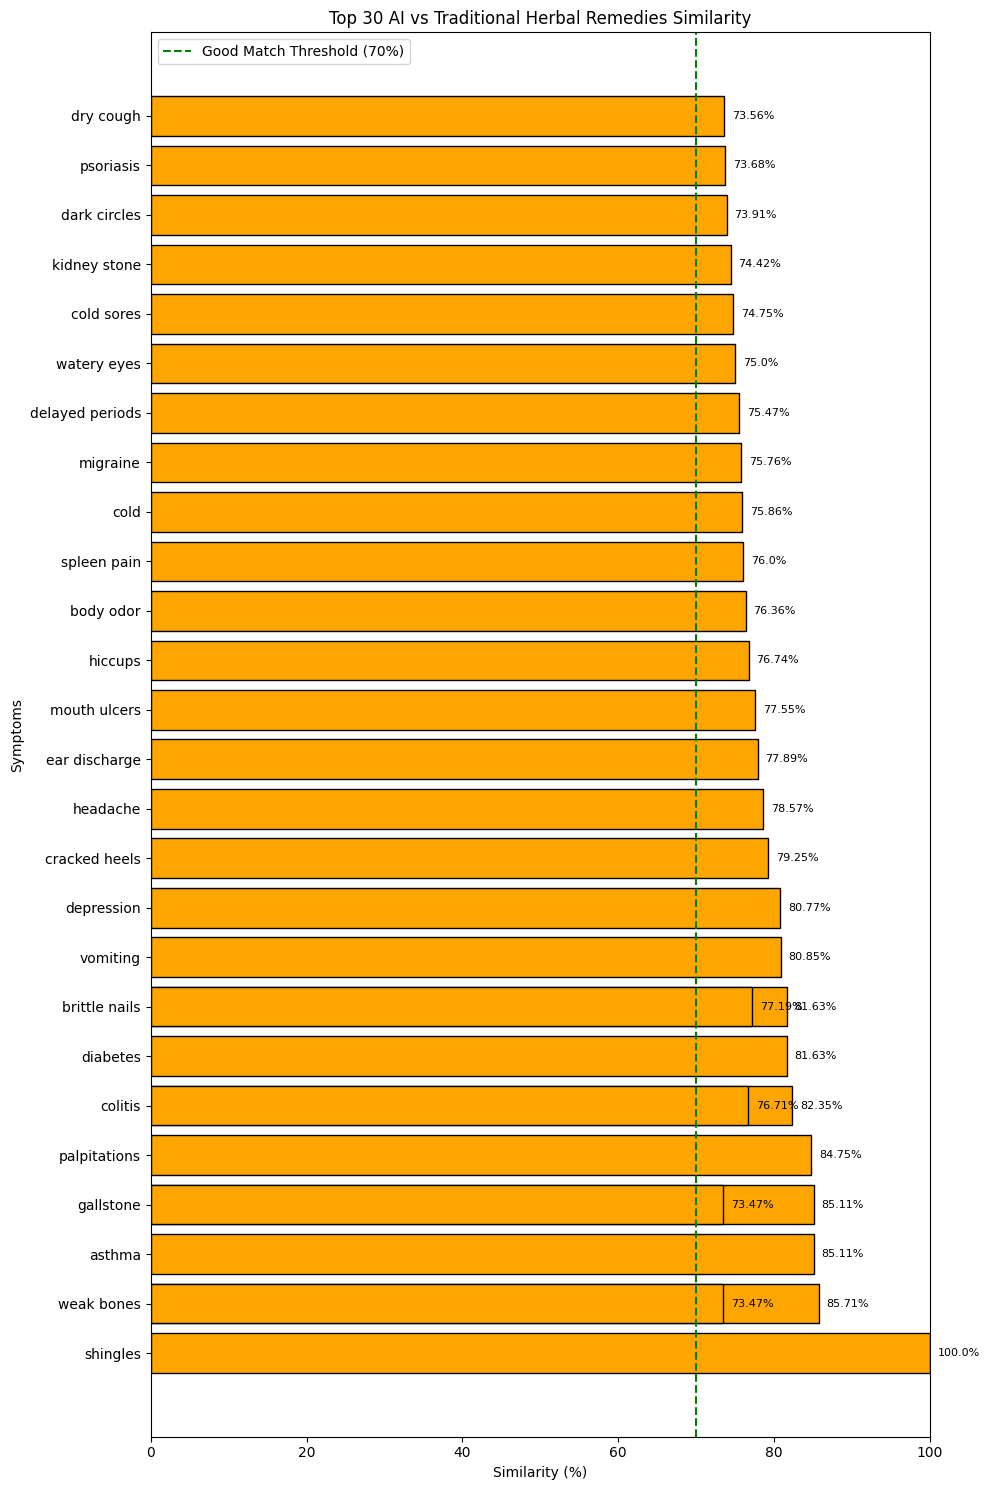

In [44]:
import pandas as pd
from difflib import SequenceMatcher
import matplotlib.pyplot as plt

# Step 2: Merge the data on 'Symptom'
merged_df = pd.merge(data, traditional_df, on="Symptom")

# Step 3: Calculate similarity
similarity_scores = []
for index, row in merged_df.iterrows():
    ai = str(row['Herbal_Remedies']).lower()
    traditional = str(row['Traditional_Remedies']).lower()
    score = SequenceMatcher(None, ai, traditional).ratio()
    similarity_scores.append(round(score * 100, 2))

# Add scores to DataFrame
merged_df["Similarity (%)"] = similarity_scores
# Print merged comparison table
print(merged_df)
top_30_df = merged_df.sort_values(by="Similarity (%)", ascending=False).head(30)
# Step 4: Plot bar graph
plt.figure(figsize=(10, 15))
bars = plt.barh(top_30_df["Symptom"], top_30_df["Similarity (%)"], color='orange', edgecolor='black')
plt.axvline(x=70, color='green', linestyle='--', label='Good Match Threshold (70%)')
plt.xlabel("Similarity (%)")
plt.ylabel("Symptoms")
plt.title("Top 30 AI vs Traditional Herbal Remedies Similarity")
plt.xlim(0, 100)
plt.legend()

# Annotate
for bar, score in zip(bars, top_30_df["Similarity (%)"]):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'{score}%', va='center', fontsize=8)

plt.tight_layout()
plt.show()